<a href="https://colab.research.google.com/github/mpt777/Math215/blob/main/Lab7_Least_squares_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 7 - Least squares II**

Enter your code in the spaces provided. Do not change any of the variable names or function names that are already provided for you. In places where we specify the name of the return value, make sure that your code produces the a value with the correct name.

In [ ]:
# Do not edit this cell.

LabID="Lab7"

try:
  from graderHelp import ISGRADEPLOT
except ImportError:
  ISGRADEPLOT = True

**Enter your name, section number, and BYU NetID**

In [ ]:
# Enter your first and last names in between the quotation marks.

first_name="Marshal"

last_name="Taylor"

# Enter your Math 215 section number in between the quotation marks. 

section_number="001"  

# Enter your BYU NetID in between the quotation marks.  NOT YOUR BYU ID NUMBER! 

BYUNetID="mpt777"  

**Import the data set**

The simplest way to load the data into Colab is to first download it as a .csv file to your local computer by clicking the link

https://drive.google.com/uc?export=download&id=1iFTaBmnv1X66BO9cV_RP7OxvUr9dNJ-l

This will allow you to download the data as a .csv file.  In the top left corner of this screen you should see a little file folder icon.  Selecting it opens a new window to the left of the notebook with three tabs: "Upload", "Refresh", and "Mount Drive".  Select "Upload". This should bring up a window that allows you to select the file "Lab7data" from your local machine, which will upload the file to your notebook. You will need to do this again if you decide to close your notebook and reopen it at a later time. 

Once you've uploaded your file, convert it to a NumPy array called "signal_data" by executing the following cell.

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('Lab7data.csv')
signal_data=df.values
signal_data

array([[0.        , 0.42908643],
       [0.01      , 0.4541735 ],
       [0.02      , 0.43351901],
       ...,
       [6.26      , 0.4964696 ],
       [6.27      , 0.5578126 ],
       [6.28      , 0.46953165]])

**Problem 1**

In [6]:
T=signal_data[:, 0]        # Replace the value of 0 with the NumPy vector that contains all of the time values in the array signal_data (the first column).

Y=signal_data[:, 1]         # Replace the value of 0 with the NumPy vector that contains all of the signal amplitude values in the array signal_data (the second column).

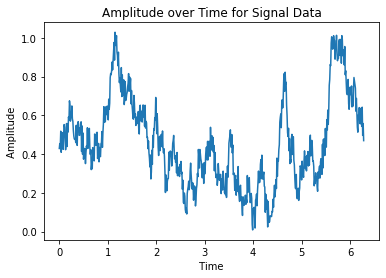

In [8]:
import matplotlib.pyplot as plt

plt.plot(T, Y)
plt.title("Amplitude over Time for Signal Data")
plt.xlabel(" Time ")
plt.ylabel(" Amplitude ")
plt.show()

# Create the plot here of the data in the vectors T and Y.

**Problem 2**

In [9]:
# This function returns the row [1,cos(t),sin(t), cos(2*t), sin(2*t) , ... , cos(n*t), sin(n*t)] of our matrix X.

def row_func(t,n):
  L = [f(k * t) for k in range(1, n+1) for f in [np.cos, np.sin]]
  L.insert(0,1)
  return L # Put your return value here.

**Problem 3**

In [18]:
# This function returns the matrix X, which we call the design matrix.

def design_matrix(n):
  X = [row_func(T[k], n) for k in range(len(T))]
  return np.asarray(X) # Put your return value here.

**Problem 4**

In [19]:
X2=design_matrix(2)   # Replace the value of 0 with the NumPy array that is returned from the function call design_matrix(2).

**Problem 5**

In [20]:
# Replace all of the 0 values with the NumPy matrices and vectors requested in Problem 5.

normal_coef2 = np.array(np.matmul(np.transpose(X2), X2))

normal_vect2 = np.array(np.matmul(np.transpose(X2), Y))

beta2 = np.linalg.solve(normal_coef2, normal_vect2)

**Problem 6**

In [22]:
# This is our function which approximates the signal strength when n=2.

def f2(t):
  x = np.asarray(row_func(t,2))
  y = np.dot(beta2, x)
  return y # Put your return value here.

**Problem 7**

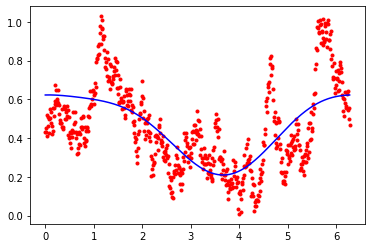

In [23]:
# Create your plot here.  
vf2=np.vectorize(f2)    # This creates a new function, vf2, which is
                        # the same as f2 except for the fact that is
                        # can take a NumPy array as input, instead of
                        # individual values.

plt.plot(T,Y,'r.')      # Creating the plot of the data points in Y
                        # using small red dots.

plt.plot(T,vf2(T),'b-') # Creating the plot of the function f2 with a
                        # blue line. Here we use the function vf2
                        # instead of f2, since we are plugging in a
                        # NumPy array T.

plt.show()              # Display the plots.

**Problem 8**

In [24]:
MSE2 = (1/629)*( (np.linalg.norm( np.dot(X2, beta2) - Y) ) ** 2 )    # Replace the 0 value with the mean square error you compute in Problem 8.

**Problem 9**

In [27]:
# Replace the 0 values with the values requested in Problem 9.  Remember to copy the decimal values from your practice notebook, not the formulas you used to compute them.

MSE10 = 0.009348751458203415

pred10 = 0.5087757565416515


0.5087757565416515


**Problem 10**

In [31]:
# Replace the 0 values with the values requested in Problem 10.  Remember to copy the decimal values from your practice notebook, not the formulas you used to compute them.

MSE100 = 0.0014547562364331283

pred100 = 0.5089902472113171

**Problem 11**

In [40]:
# Replace the 0 values with the values requested in Problem 11.  Remember to copy the decimal values from your practice notebook, not the formulas you used to compute them.
MSE1000 = 3.1095435053994233e-27

pred1000 = 63.223687525069195

**STOP!  BEFORE YOU SUBMIT THIS LAB:**  Go to the "Runtime" menu at the top of this page, and select "Restart and run all".  If any of the cells produce error messages, you will either need to fix the error(s) or delete the code that is causing the error(s).  Then use "Restart and run all" again to see if there are any new errors.  Repeat this until no new error messages show up.   

**You are not ready to submit until you are able to select "Restart and run all" without any new error messages showing up.  Your code will not be able to be graded if there are any error messages.**

To submit your lab for grading you must first download it to your compute as .py file. In the "File" menu select "Download .py". The resulting file can then be uploaded to http://www.math.byu.edu:30000 for grading.